In [30]:
# EMAIL SPAM CLASSIFIER USING LOGISTIC REGRESSION + SVM
# Dataset: spam_or_not_spam.csv

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# 1.Load Dataset
data = pd.read_csv("spam_or_not_spam.csv")

print(" Columns in dataset:", data.columns.tolist())
print("\n Sample Data:")
display(data.head())
data.rename(columns={'email': 'message', 'label': 'label'}, inplace=True)

# Convert labels to numeric (already 0 = ham, 1 = spam)
data['label_num'] = data['label']


 Columns in dataset: ['email', 'label']

 Sample Data:


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0



Performance of Logistic Regression:
Accuracy:  0.9733
Precision: 1.0000
Recall:    0.8316
F1 Score:  0.9080

Confusion Matrix:
 [[505   0]
 [ 16  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       505
           1       1.00      0.83      0.91        95

    accuracy                           0.97       600
   macro avg       0.98      0.92      0.95       600
weighted avg       0.97      0.97      0.97       600



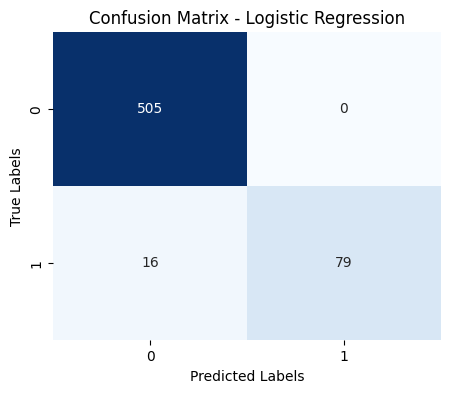


Performance of SVM (LinearSVC):
Accuracy:  0.9850
Precision: 0.9886
Recall:    0.9158
F1 Score:  0.9508

Confusion Matrix:
 [[504   1]
 [  8  87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       505
           1       0.99      0.92      0.95        95

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.98      0.98       600



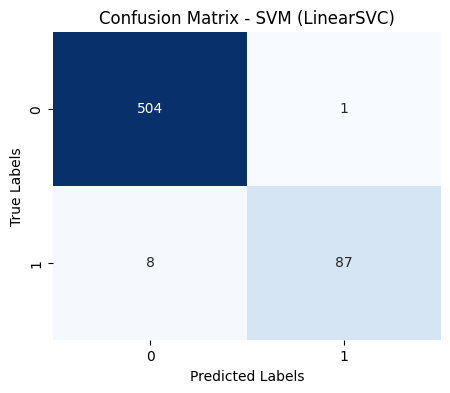

In [31]:
#2.Clean the Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['clean_message'] = data['message'].apply(clean_text)

# 3.Split Data
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_message'], data['label_num'],
    test_size=0.2, random_state=42
)

# 4️.TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=4000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5️.Train Models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# 6️.Evaluation Function with Heatmap
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nPerformance of {model_name}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")

    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

     # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM (LinearSVC)")


In [32]:
# 7️.Predict Custom Email
def predict_email(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    log_pred = log_model.predict(vec)[0]
    svm_pred = svm_model.predict(vec)[0]

    print("\n Custom Email Test:")
    print(f"Email Text: {text}")
    print(f"Logistic Prediction: {'SPAM' if log_pred else 'HAM'}")
    print(f"SVM Prediction: {'SPAM' if svm_pred else 'HAM'}")

# 8️.Example Predictions
predict_email("Congratulations! You've won a free vacation. Click the link to claim your prize!")
predict_email("Hi Alex, just wanted to confirm our meeting schedule for tomorrow.")



 Custom Email Test:
Email Text: Congratulations! You've won a free vacation. Click the link to claim your prize!
Logistic Prediction: SPAM
SVM Prediction: SPAM

 Custom Email Test:
Email Text: Hi Alex, just wanted to confirm our meeting schedule for tomorrow.
Logistic Prediction: HAM
SVM Prediction: HAM
